### Оглавление проекта

* [Описание проекта](#Описание)
* [Обзор данных и подготовка к исследованию:](#Подготовка)  
* [Исследовательский анализ данных:](#Анализ)
* [Портрет пользователя в разных регионах](#Портрет)
* [Проверка гипотез](#Гипотезы)
* [Общий вывод](#Выводы)

### Описание проекта <a id='Описание'></a>


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

Данные за 2016 год могут быть неполными.

### Обзор данных и подготовка к исследованию <a id='Подготовка'></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import levene

In [3]:
data=pd.read_csv('/datasets/games.csv')

Посмотрим на данные в предоставленной таблице:

In [4]:
display(data.sample(50))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5182,One Piece: Gigant Battle!,DS,2010.0,Fighting,0.00,0.00,0.36,0.00,NaN,NaN,NaN
11245,Lara Croft and the Temple of Osiris,PS4,2014.0,Action,0.00,0.07,0.00,0.01,74.0,6.7,T
3310,Petz: Dogz Pack,DS,2008.0,Simulation,0.56,0.00,0.00,0.05,NaN,NaN,NaN
3313,Dragon Ball Z: Buu's Fury,GBA,2004.0,Action,0.44,0.16,0.00,0.01,62.0,8.9,E
11018,NERF N-Strike: Double Blast Bundle,Wii,2010.0,Shooter,0.09,0.00,0.00,0.00,NaN,tbd,E10+
10545,Urban Chaos,PS,1999.0,Action,0.06,0.04,0.00,0.01,NaN,NaN,NaN
12795,Starwinder: The Ultimate Space Race,PS,1996.0,Racing,0.03,0.02,0.00,0.00,NaN,NaN,NaN
828,Ghostbusters: The Video Game (DS Version),PS3,2010.0,Action,0.60,0.96,0.13,0.36,NaN,NaN,NaN
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
7060,Naruto: Ninja Council 2 European Version,DS,2005.0,Fighting,0.00,0.00,0.23,0.00,NaN,NaN,NaN


* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

###### 1) Заменим названия столбцов, приведя их к нижнему регистру:

In [4]:
#напишем цикл, который применит метод lower() ко всем названиям столбцов:
data.columns = data.columns.str.lower()

#проверим результат
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


###### 2) Преобразуем данные в нужные типы:

In [6]:
#посмотрим в каких форматах предоставлены данные:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заменим форматы данных в колонках:

1) **'year_of_release'** - переведем в целове число, т.к. год - это всегда целое число

2) **'user_score'** - переведем из строки в вещественное число

c 'user_score' возникла проблема: помимо пропусков значений, у нас ест значение "tbd", вероятно, предполагающий что-то вроде 'to be determined'. Т.е. значения, которые еще не определены. Если мы заменим их на 0, то это может повлиять на среднее, подобных строк - 2424. 
Поэтому я удалю эти значения, для того, чтоб иметь возможность поменять формат столбца и производить математические операции с рейтингом.


In [7]:
#display(data[(data['rating'].isna() == True) & (data['user_score'] == 'tbd')])

#удалим значения 'tbd'
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
        
#проверим, что таких значений больше нет
print("Строк с оценкой 'tbd':",data[data['user_score'] == 'tbd']['user_score'].count())

Строк с оценкой 'tbd': 0


Есть пропуски в годе выпуска игры. Заменим его на 0, чтоб попробовать заполнить год выпуска игры, взяв его из названия.

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(0)

#переведем год в int
data=data.astype({'year_of_release': int}, errors='ignore')

#создадим список годов выпуска игр, которые есть у нас в данных:
years_list = list(data['year_of_release'].unique())

print(years_list)

[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 0, 1995, 1991, 1981, 1987, 1980, 1983]


In [9]:
print('Количество 0 в годах выпуска до применения функции:', data[data['year_of_release'] == 0]['year_of_release'].count())

#напишем функцию, которая вытащит год из названия игры, там, где год неизвестен
def find_year_in_name(row):
    name = row['name']
    release_year = row['year_of_release']
    if release_year == 0:
        for year in years_list:
            if str(year) in name:
                return year
            else:
                return 0
    else:
        return release_year

#тест функции
#d = {'name': ['WARCRAFT 2014', 'Mario 1984', 'FutureGame 2020'], 'year_of_release': [0, 1985, 0]}
#df = pd.DataFrame(data=d)
#df['year_of_release'] = df.apply(find_year_in_name, axis=1)
#print(df)

#применим функцию
data['year_of_release'] = data.apply(find_year_in_name, axis=1)


print('Количество 0 в годах выпуска после применения функции:',data[data['year_of_release'] == 0]['year_of_release'].count())


Количество 0 в годах выпуска до применения функции: 269
Количество 0 в годах выпуска после применения функции: 267


После применения функции, у нас остались 0 в годах, но т.к. дальнейшие исследования строятся на годе выпуска, а % пропущенных значений всего 1,5, то удалим эти строки <a id='нет0годов'></a>

In [10]:
#оставим в таблице только ненулевые значения года выпуска
data = data[data['year_of_release'] > 0]


In [11]:
#переведем 'user_score' в вещестенное число
data=data.astype({'user_score': float}, errors='ignore')

#проверим обновленные типы данных
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16448 non-null  object 
 2   year_of_release  16448 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16448 non-null  float64
 5   eu_sales         16448 non-null  float64
 6   jp_sales         16448 non-null  float64
 7   other_sales      16448 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропусков в оценках очень много и мы не можем избавиться от этих строк. 
Заменим пропуски в оценках на 0 для проведения математических операций с ними <a id='оценка0'></a>

In [12]:
data['critic_score'] = data['critic_score'].fillna(0) 
data['user_score'] = data['critic_score'].fillna(0) 

Для поля 'rating' замена на 0 будет выглядеть странно, давайте используем рейтинг 'RP' для пропущенных значений

In [13]:
data['rating'] = data['rating'].fillna('RP') 

###### 3) Разберемся с пропусками и невалидными значениями.

На всякий случай проверим, нет ли дубликатов в таблице.

In [14]:
print('Количество дубликатов в таблице:', data.duplicated().sum())

Количество дубликатов в таблице: 0


Посмотрим на значения в столбце 'rating'.

In [15]:
print(data['rating'].unique())

['E' 'RP' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC']


Посмотрим, что значат эти рейтинги: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

* EC - Early childhood
* E - Everyone. Сюда же нужно отнести и K-A(Kids to Adults) - это старое обозначение.
* E10 - Everyone 10 and older
* T - Teen
* M - Mature
* AO - Adults Only 18+
* RP - Rating Pending

Исходя из этого, нужно объединить E и K-A

In [16]:
data['rating'].loc[data['rating'] == 'K-A'] = 'E'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
#проверим пропуски в name:
print(data[data['name'].isna() == True])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           0.0         0.0     RP  
14244         0.00           0.0         0.0     RP  


Есть две строчки без имени игры, жанра и рейтингов. Такие строки нам не будут полезны. Т.к. их всего 2 из 16 тыс, просто избавимся от них. 

In [18]:
data = data[data['name'].isna() == False]

Эффективность данной функции - всего две дополнительные записи, но было очень интересно решить такую задачку :)

###### 4) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [5]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Выводы:**

Данные выглядят достоверно. Есть два момента которые стоит учитывать далее:
- пропуски в оценках пользователей, оценках критиков и рейтингах. Это можно случиться по разным причинам. Пропуски формируются из-за миграции данных, человеческого фактора(ошибка при внесении), или, что тут вероятнее всего, по части игр оценки не были собраны в принципе или еще не успели собраться;
- в описании проекта сказано, что части данных за 2016 год может не быть. Это стоит помнить и корректировать выводы с учётом этого.

In [20]:
# Посмотрим, что у нас осталось
temp = data.copy() 
print(temp.info())
print('-------------------------')
print('name', temp.name.sort_values().unique())
print('name: кол-во NaN, доля',temp.name.isna().sum(), temp.name.isna().sum()/len(temp))
print('-------------------------')
print('platform', temp.platform.sort_values().unique())
print('platform: кол-во NaN, доля',temp.platform.isna().sum(), temp.platform.isna().sum()/len(temp))
print('-------------------------')
print('year_of_release', temp.year_of_release.sort_values().unique())
print('year_of_release: кол-во 0', temp.year_of_release[data.year_of_release == 0].count())
print('year_of_release: кол-во NaN, доля',temp.year_of_release.isna().sum(), temp.year_of_release.isna().sum()/len(temp))
print('-------------------------')
print('genre', temp.genre.sort_values().unique())
print('genre: кол-во NaN, доля',temp.genre.isna().sum(), temp.genre.isna().sum()/len(temp))
print('-------------------------')
print('critic_score', temp.critic_score.sort_values().unique())
print('critic_score: кол-во NaN, доля', temp.critic_score.isna().sum(), temp.critic_score.isna().sum()/len(temp))
print('-------------------------')
print('user_score', temp.user_score.sort_values().unique())
print('user_score: кол-во 0', temp.user_score[temp.user_score == 0].count())
print('user_score: кол-во NaN, доля',temp.user_score.isna().sum(), temp.user_score.isna().sum()/len(temp))
print('-------------------------')
print('rating', temp.rating.sort_values().unique())
print('rating: кол-во NaN, доля',temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

### Исследовательский анализ данных <a id='Анализ'></a>

###### 1) Посчитаем сколько игр выпускалось в разные годы

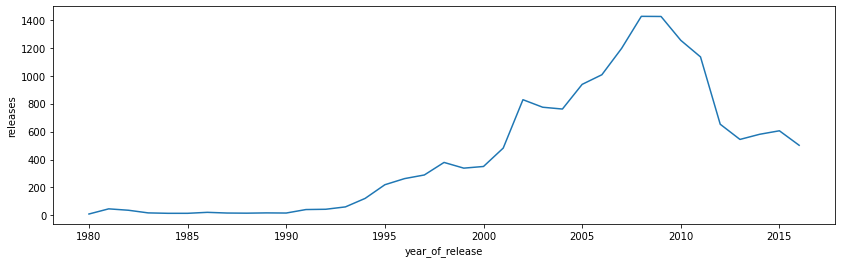

In [21]:
year_releases = data[data['year_of_release'] != 0].groupby('year_of_release')['total_sales'].count()
year_releases.plot(figsize=(14, 4)) 
plt.ylabel("releases")
plt.show()

**Выводы:**
- до 1994 года количество игр определялось десятками и не сильно расло от года к году;
- с 1994 года до 2003 года виден резкий рост. Игры стали выпускаться тысячами. Этот рост сохранялся до 2008 года;
- в 2008 году случился мировой финансовый кризис, что так же отражается и на графике продаж игр;
- после нескольких лет упадка, в индустрии наметился тренд на рост после 2012 года;
- падение графика после 2015 года выглядит как отсуствие части данных за 2016 год. Это оговаривается и в описании предоставленных данных. Быстрый ресерч подтверждает это предположение: после 2012 года, индустрия видеоигр только росла. 


###### 1) Посмотрим, как менялись продажи по платформам

In [22]:
#выберем топ-10 платформ с наибольшими суммарными продажами за весь период
total_sales_platform = data.groupby('platform')['total_sales'].sum()
print(total_sales_platform.sort_values(ascending=False).head(10))


platform
PS2     1236.60
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


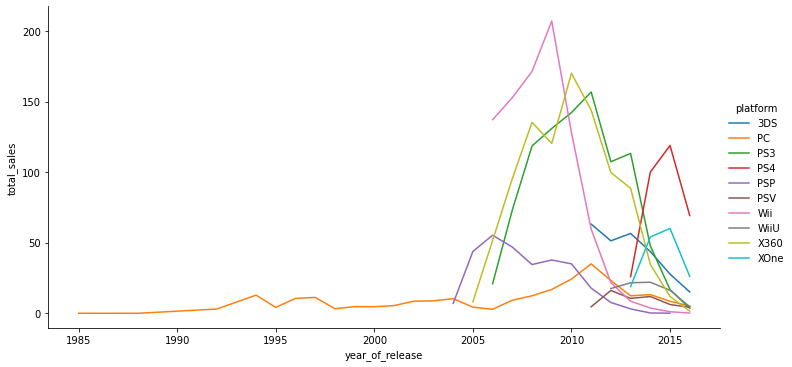

In [23]:
#посмотрим на то, как менялись продажи по этим платформам 
#добавим в срез платформы PC и X-Box, как популярные ранее платформы, для оценки сменяемости 
top_sales_platform = data[data['year_of_release'] > 0]
top_sales_platform = top_sales_platform[(top_sales_platform['platform'] == 'PS4') | 
                                        (top_sales_platform['platform'] == 'XOne') | 
                                        (top_sales_platform['platform'] == '3DS') | 
                                        (top_sales_platform['platform'] == 'PS3') | 
                                        (top_sales_platform['platform'] == 'X360') | 
                                        (top_sales_platform['platform'] == 'WiiU') | 
                                        (top_sales_platform['platform'] == 'PC') |
                                        (top_sales_platform['platform'] == 'WiiU') |
                                        (top_sales_platform['platform'] == 'PSV') |
                                        (top_sales_platform['platform'] == 'Wii') |
                                        (top_sales_platform['platform'] == 'PSP')]
top_sales_platform = top_sales_platform.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()


sns.relplot(x="year_of_release", y="total_sales", hue="platform", kind="line", height=5, aspect=2, data=top_sales_platform)

Давайте на всякий случай проверим еще, что в последние годы не появилось новой платформы, которая только-только начала набирать обороты и не успела еще попасть в топ-продаж. 

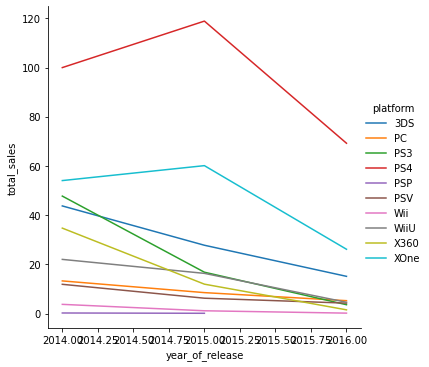

In [24]:
#построим аналогичный график по всем платформам в последние три года
top_sales_platform_new = data[data['year_of_release'] >= 2014]
top_sales_platform_new = top_sales_platform_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()


sns.relplot(x="year_of_release", y="total_sales", hue="platform", kind="line", data=top_sales_platform_new)

Новой растущей платформы не нашлось.

**Выводы:**
- В последние 5 лет лидером по проданым копиям является Playstation платформа. PS4 пришла на смену PS3, сохранив лидерство в продажах;
- Платформа появляется и устаревает за 5-10 лет. До 2012 года это было около 10 лет, ближе к 2016 - 5 лет. Это не касается платформы персональных компьютеров, продажи на нее на удивление стабильны;
- Самые новые платформы, которые показывают лучшие продажи: PlayStation4 и X One. Падение графика в 2016 году, с учётом того, что глобальных финансовых катаклизмов не происходило в этот момент, вероятнее всего обусловлено отсутствием части данных. Падение выглядит неестественно слишком резко.

Исходя из этого, не стоит смотреть на период дальше 5 лет назад. Это обусловлено периодом устаревания платформ. 

###### 2) Выберем несколько потенциально прибыльных платформ.

In [25]:
#оставим в датасете данные только за последние 4 года:
data = data[data['year_of_release'] >= 2013]

In [26]:
#посмотрим, изменился ли топ платформ по продажам
total_sales_platform = data.groupby('platform')['total_sales'].sum()
print(total_sales_platform.sort_values(ascending=False).head(10))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


In [27]:
#посмотрим на топ платформ по выпуску игр
total_release_platform = data.groupby('platform')['name'].count()
print(total_release_platform.sort_values(ascending=False).head(10))

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
Name: name, dtype: int64


**Выводы:**

- стабильной во все времена остаётся PC, при среднем количесвте выпускаемых игр, они дают средние в топе продажи;
- не хотелось бы рекомендовать вкладывать ресурсы в игры под PSV. Игр под эту платформу выпускается сравнительно много, а вот продаж они генерят почти меньше всего в топе;
- возможно, стоит посмотреть на платформы Wii и WiiU. Игр под них выпускается очень мало(в сравнении с другими платформами в топе), однако это не мешает им быть в топе по количеству продаж;
- самые последние платформы популярных линеек: PS4 и X-One. Появились не более 3 лет назад, они генерят большую часть продаж, а значит можно рассматривать их как перспективные платформы. 

###### 3) Построим диаграмму размаха глобальных продаж игр в разбивке по платформам

Для того, чтоб получить читабельные графики, очистим данные от выбросов. Для этого ограничим значения 5-ым и 95-ым квантилем (они выбраны потому что 25 и 75 отбрасывают слишком много значений). 

In [28]:
#определим 5-ый и 95-ый квантиль
print(data['total_sales'].quantile(0.05))
print(data['total_sales'].quantile(0.95))




0.01
2.1220000000000026


Диаграмма размаха по полным данным


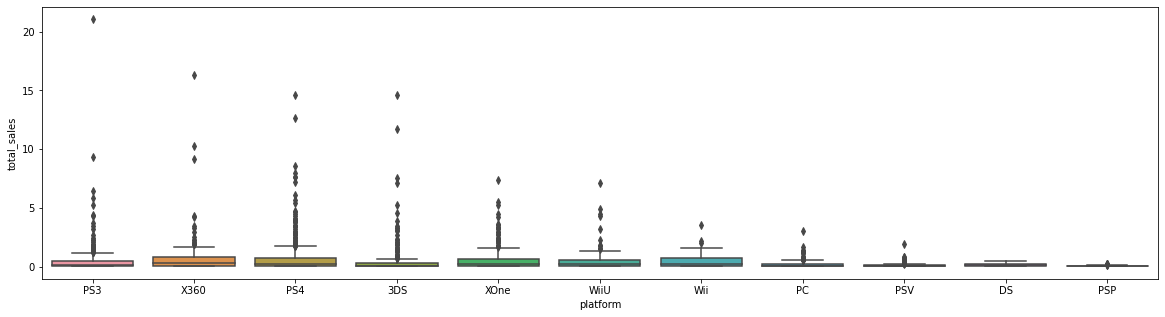

In [29]:
#построим диаграммы размаха по олным данным
print('Диаграмма размаха по полным данным')
plt.figure(figsize=(20,5))
sns.boxplot(
    data=data,
    x='platform',
    y='total_sales')
plt.show()

Диаграмма размаха по данным без выбросов


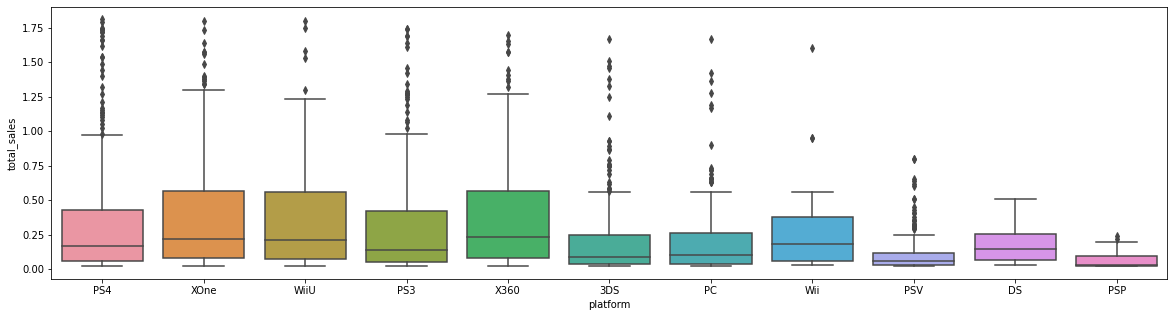

In [30]:
#удалим выбивающиеся значения
data = data[(data['total_sales'] < 1.83) &
                (data['total_sales'] > 0.01)]

print('Диаграмма размаха по данным без выбросов')
#построим диаграммы размаха по продажам для всех платформ
plt.figure(figsize=(20,5))
sns.boxplot(
    data=data,
    x='platform',
    y='total_sales')
plt.show()

**Выводы:**
- самые продаваемые в среднем игры выпуска(лись/ются) для платформ: PlayStation3, X-360, X-One. 
- чаще всего, особо-успешные игры (попадающие в выобросы) встречаются на платформе PlayStation3

В данной диаграмме смущает то, что статистика размазана по разным версиям приставок, например PlayStation2, PlayStation3 и PlayStation4. Интересно посмотреть на статистику, объединив платформы по линейкам, оставив разбивку на консольные и портативные. 

(0.0, 2.0)

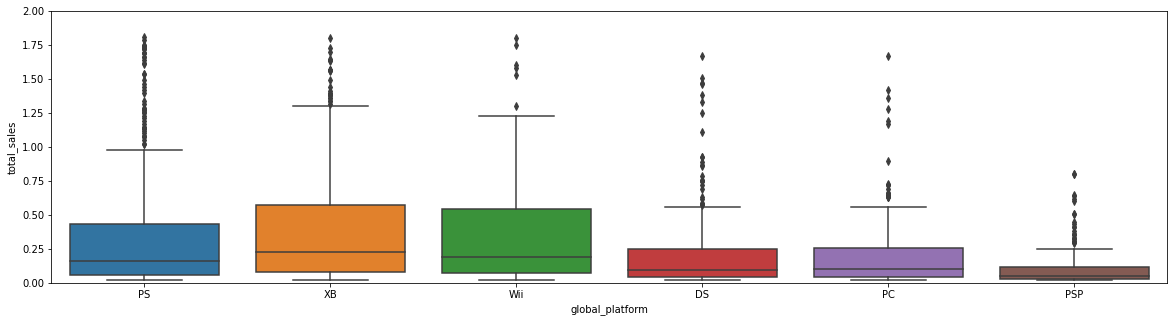

In [31]:
#создадим копию датасета 
data_global_platforms = data

#напишем функцию, которая объединит приставки разных версий
def global_platform(platform):
    if platform == 'PS2' or platform == 'PS3' or platform == 'PS4':
        return 'PS'
    elif platform == 'WiiU':
        return 'Wii'
    elif platform == '3DS' or platform == 'GBA':
        return 'DS'
    elif platform == 'PSV':
        return 'PSP'
    if platform == 'X360' or platform == 'XOne':
        return 'XB'
    else:
        return platform

#применим функцию к нашему датасету
data_global_platforms['global_platform'] = data_global_platforms['platform'].apply(global_platform)

#построим диаграмму размаха по новым данным
plt.figure(figsize=(20,5))
sns.boxplot(
    data=data_global_platforms,
    x='global_platform',
    y='total_sales')        

plt.ylim(0, 2)

**Выводы:**
- самые продаваемые игры производятся под X-Box
- но, в общем, средние продажи для PlayStation, X-Box и Wii отличаются не сильно
- консоли опережают по средним продажам портативные платформы
- если говорить о производителе в общем, то особо-успешные игры выпускаются на PlayStation и X-Box примерно одинаково. 

###### 4) Оценим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [32]:
#сделаем срез данных по PS4
data_ps4 = data[(data['platform'] == 'PS4') & (data['critic_score'] > 0) & (data['user_score'] > 0)]

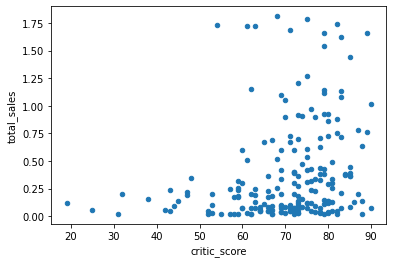

Коэффициен корреляции:  0.24000105031366703


In [33]:
#оценим влияние оценки критиков
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_ps4['critic_score'].corr(data_ps4['total_sales']))


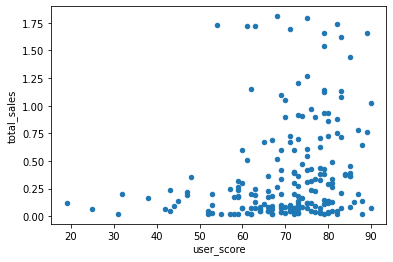

Коэффициен корреляции:  0.24000105031366703


In [34]:
#оценим влияние оценки пользователей
data_ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_ps4['user_score'].corr(data_ps4['total_sales']))

**Выводы:**
- оценка критиков игр на PS4 коррелирует с продажами, но не очень ярко. Предположим, что критики, профессионально могут оценить игру и её перспективы, поэтому чаще "попадают" оценкой в объем продаж. Так же их оценка может быть заложена в бюджет раскручевыемых игр. А чем лучше маркетинг - тем лучше продажи.  
- оценка пользователей не влияет на объем продаж. Возможно, это связано с субъективностью мнения обычных пользователей.

**На другие платформы.**
1) Посмотрим на конкурента PS4 - XOne

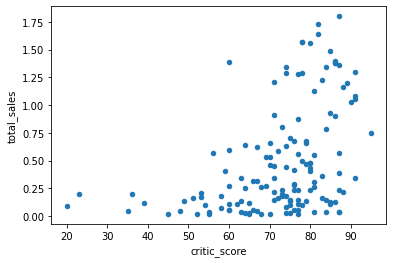

Коэффициен корреляции:  0.4264484890497219


In [35]:
#сделаем срез данных по XOne
data_xone = data[(data['platform'] == 'XOne') & (data['critic_score'] > 0) & (data['user_score'] > 0)]

#оценим влияние оценки критиков
data_xone.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_xone['critic_score'].corr(data_xone['total_sales']))


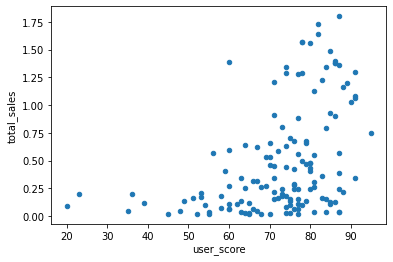

Коэффициен корреляции:  0.4264484890497219


In [36]:
#оценим влияние оценки пользователей
data_xone.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_xone['user_score'].corr(data_xone['total_sales']))

2) Посмотрим на эту же связь на портативной модели - 3DS

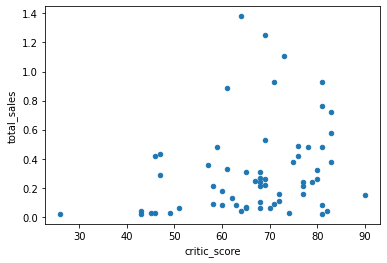

Коэффициен корреляции:  0.24658195235899288


In [37]:
#сделаем срез данных по 3DS
data_3ds = data[(data['platform'] == '3DS') & (data['critic_score'] > 0) & (data['user_score'] > 0)]

#оценим влияние оценки критиков
data_3ds.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_3ds['critic_score'].corr(data_3ds['total_sales']))

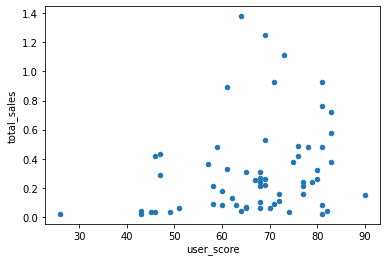

Коэффициен корреляции:  0.24658195235899288


In [38]:
#оценим влияние оценки пользователей
data_3ds.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_3ds['user_score'].corr(data_3ds['total_sales']))

3) Посмотрим еще одну портативную модель - PSV

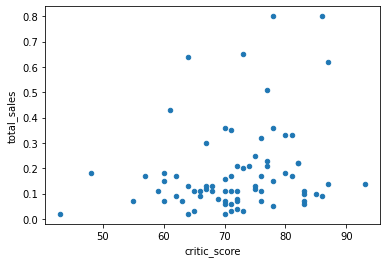

Коэффициен корреляции:  0.23361716001331798


In [39]:
#сделаем срез данных по PSV
data_psv = data[(data['platform'] == 'PSV') & (data['critic_score'] > 0) & (data['user_score'] > 0)]

#оценим влияние оценки критиков
data_psv.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_psv['critic_score'].corr(data_psv['total_sales']))

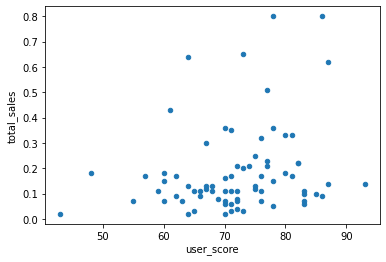

Коэффициен корреляции:  0.23361716001331798


In [40]:
#оценим влияние оценки пользователей
data_psv.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_psv['user_score'].corr(data_psv['total_sales']))

###### 5) Оценим, как влияют на продажи в общем отзывы пользователей и критиков.

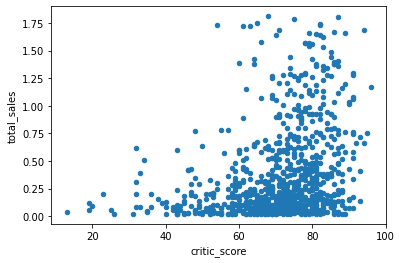

Коэффициен корреляции:  0.2986109496164101


In [41]:
#оценим влияние оценки критиков
data_cor = data[(data['critic_score'] > 0) & (data['user_score'] > 0)]
data_cor.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_cor['critic_score'].corr(data_cor['total_sales']))


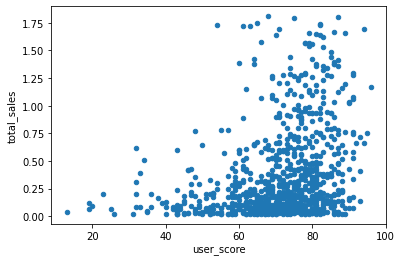

Коэффициен корреляции:  0.2986109496164101


In [42]:
#оценим влияние оценки пользователей
data_cor.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('Коэффициен корреляции: ',data_cor['user_score'].corr(data_cor['total_sales']))

**Выводы:**
- картина не сильно меняется, если смотреть на корреляцию в общем, а не в рамках конкретной платформы
- оценка критиков неярко, но коррелирует с продажами, а вот оценка пользователей на продажи не влияет
- корреляция не меняется в случае, если смотреть на различные платформы.

###### 6) Посмотрим на общее распределение игр по жанрам. 

Для того, чтоб понять самые продоваемые жанры, оценим среднее количество продаж в жанре на одну выпущеную игру. 

In [43]:
#создадим сводную таблицу с данными о продажах и количестве выпущенных игр
total_sales_genre = data.pivot_table(index = ('genre'), values = 'total_sales', aggfunc = ('count', 'sum')).reset_index()

#посчитаем сколько в среднем приходится продаж на одну игру в жанре
total_sales_genre['mean_sales'] = total_sales_genre['sum'] / total_sales_genre['count']
display(total_sales_genre.sort_values(by='mean_sales', ascending=False))


,genre,count,sum,mean_sales
8,Shooter,145,67.85,0.467931
4,Platform,63,25.04,0.397460
10,Sports,174,67.39,0.387299
6,Racing,70,20.81,0.297286
7,Role-Playing,270,73.85,0.273519
2,Fighting,75,20.09,0.267867
0,Action,654,171.25,0.261850
3,Misc,135,31.70,0.234815
5,Puzzle,14,3.14,0.224286
9,Simulation,51,10.36,0.203137


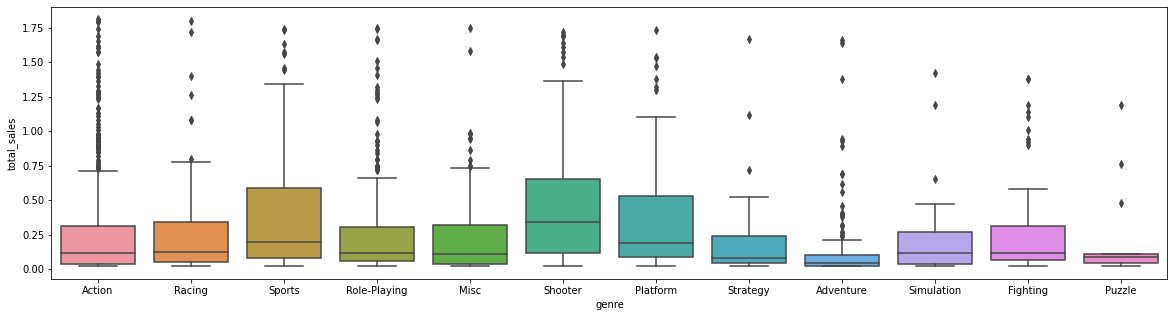

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=data,
    x='genre',
    y='total_sales')
plt.show()

**Выводы:**
- самый продаваемый жанр: 'Shooter'. Он значимо выбивается по продажам от остальных жанров 
- интересно, что 'Action' выпускается очень часто(самый популярный по релизам жанр), а вот продажи у него средние
- самые низкие продажи у жанра 'Adventure'. Опять же, при большом количестве релизов этого жанра, средние продажи колоссально отличаются от лидеров списка
- хорошим вариантом для планирования станет выбор жанра 'Platform'. Платформеров выпускается мало, это позволит не затеряться среди новинок, и они генерят хорошие продажи. А так же диаграмма размаха подсказала нам, что можно вложиться в 'Shooter' или 'Sports' - продажи этих жанров устойчиво выше остальных. 

### Портрет пользователя в разных регионах  <a id='Портрет'></a>

###### 1) Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)

In [45]:
platform_sales_na = data.pivot_table(index = ('platform'), values = 'na_sales', aggfunc = ('sum')).reset_index().sort_values(by='na_sales', ascending=False).head()
newline1_na = {'platform': 'Other', 'na_sales':data['na_sales'].sum() - platform_sales_na['na_sales'].sum()}
platform_sales_na = platform_sales_na.append(newline1_na, ignore_index=True)

platform_sales_eu = data.pivot_table(index = ('platform'), values = 'eu_sales', aggfunc = ('sum')).reset_index().sort_values(by='eu_sales', ascending=False).head()
newline1_eu = {'platform': 'Other', 'eu_sales':data['eu_sales'].sum() - platform_sales_eu['eu_sales'].sum()}
platform_sales_eu = platform_sales_eu.append(newline1_eu, ignore_index=True)

platform_sales_jp = data.pivot_table(index = ('platform'), values = 'jp_sales', aggfunc = ('sum')).reset_index().sort_values(by='jp_sales', ascending=False).head()
newline1_jp = {'platform': 'Other', 'jp_sales':data['jp_sales'].sum() - platform_sales_jp['jp_sales'].sum()}
platform_sales_jp = platform_sales_jp.append(newline1_jp, ignore_index=True)


genre_sales_na = data.pivot_table(index = ('genre'), values = 'na_sales', aggfunc = ('sum')).reset_index().sort_values(by='na_sales', ascending=False).head()
newline2_na = {'genre': 'Other', 'na_sales':data['na_sales'].sum() - genre_sales_na['na_sales'].sum()}
genre_sales_na = genre_sales_na.append(newline2_na, ignore_index=True)

genre_sales_eu = data.pivot_table(index = ('genre'), values = 'eu_sales', aggfunc = ('sum')).reset_index().sort_values(by='eu_sales', ascending=False).head()
newline2_eu = {'genre': 'Other', 'eu_sales':data['eu_sales'].sum() - genre_sales_eu['eu_sales'].sum()}
genre_sales_eu = genre_sales_eu.append(newline2_eu, ignore_index=True)

genre_sales_jp = data.pivot_table(index = ('genre'), values = 'jp_sales', aggfunc = ('sum')).reset_index().sort_values(by='jp_sales', ascending=False).head()
newline2_jp = {'genre': 'Other', 'jp_sales':data['jp_sales'].sum() - genre_sales_jp['jp_sales'].sum()}
genre_sales_jp = genre_sales_jp.append(newline2_jp, ignore_index=True)


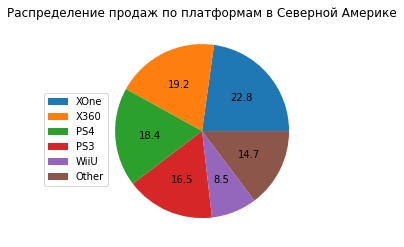

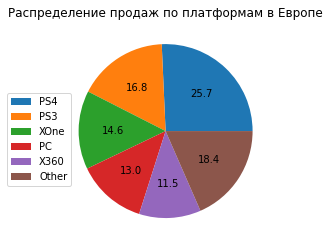

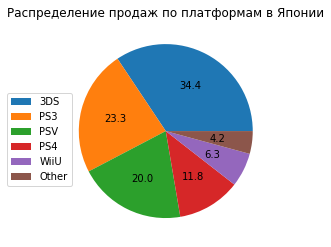

In [46]:
plt.title('Распределение продаж по платформам в Северной Америке')
plt.pie(platform_sales_na['na_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = platform_sales_na['platform'] )
plt.show()

plt.title('Распределение продаж по платформам в Европе')
plt.pie(platform_sales_eu['eu_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = platform_sales_eu['platform'])
plt.show()

plt.title('Распределение продаж по платформам в Японии')
plt.pie(platform_sales_jp['jp_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = platform_sales_jp['platform'])
plt.show()

**Выводы:**
- самые популярные платформы Северной Америки: консоли X-360(Microsoft) и Wii. Это можно объяснить тем, что прямой конкурент PlayStation: X-360 от MS выигрывает на домашней территории. 
- самые популярные платформы в Европе: консоли PlayStation3,4(Sony), XOne. Тут, как раз две конкурирующие платформы разыгрывают рынок. Видим отличие этого рынка в том, что тут в топ вышли персональные компьютеры, что не характерно для Северной Америки и Японии. 
- самые популярные платформы в Японии: DS(портативный Nintendo), PlayStation3 и портативный PlayStation. Тут, опять же: домашний регион для команий-лидеров и национальная склонность японцев к портативным приставкам. 

###### 2) Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5)

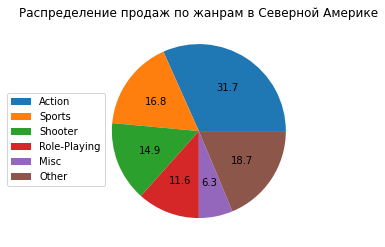

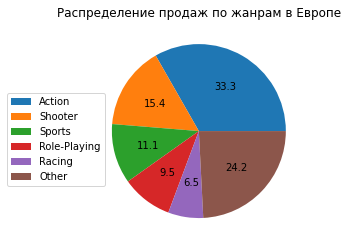

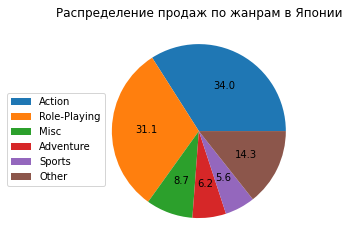

In [47]:
plt.title('Распределение продаж по жанрам в Северной Америке')
plt.pie(genre_sales_na['na_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = genre_sales_na['genre'] )
plt.show()

plt.title('Распределение продаж по жанрам в Европе')
plt.pie(genre_sales_eu['eu_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = genre_sales_eu['genre'])
plt.show()

plt.title('Распределение продаж по жанрам в Японии')
plt.pie(genre_sales_jp['jp_sales'], autopct='%.1f')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    labels = genre_sales_jp['genre'])
plt.show()

**Выводы:**
- популярные жанры в Америке и Европе достаточно похожи: лидерами являются экшены, шутеры и спортивные симуляторы, а чуть ниже - RPG. Отличием стало то, что 6,5 % продаж в Европе отдано гонкам, а вот в Северной Америке примерно столько же - музыкальным играм. 
- жанры в Японии отличаются примерно как и менталитет. Самый популярный жанр - Action, но за ним львиная доля продаж уходит rpg, который как раз и родился в Японии. Третье место за жанром Music, которого совсем нет в топе Европы и менее активно продается в Северной Америке. 

Оценим влияние рейтинга ESRB на продажи в рамках каждого региона. Использовать коэффициент корреляции мы тут не можем: рейтинги - это набор категорий, а не изменяемая величина. Так что посмотрим на продажи в рамках каждой возрастной категории. Оценивать по сумме продаж будет не очень корректно - игры релизятся в разном количестве. 
Поэтому посмотрим на средние продажи в регионе в рамках каждоро рейтинга. 

**ВАЖНЫЙ МОМЕНТ**
В рамках первой версии исследования я выкинула из исследования игры без указанного рейтинга и упустила важный момент - у части игр, которые продавались только в Европе/Японии логично не было этого рейтинга, потому что он предусмотрен только для маркировки игр в США и Канаде. Это привело к мысли, что в этом исследовании еще отдельно стоит посмотреть на те игры, которые продавались во всех трех регионах. 

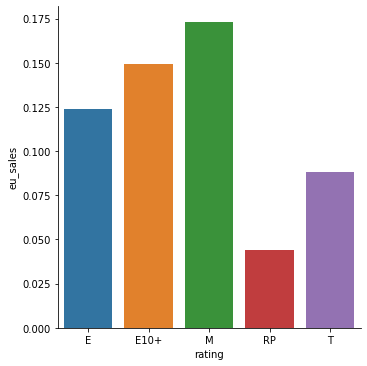

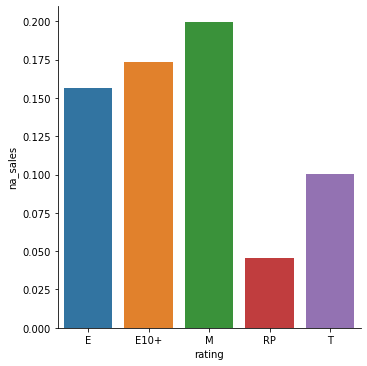

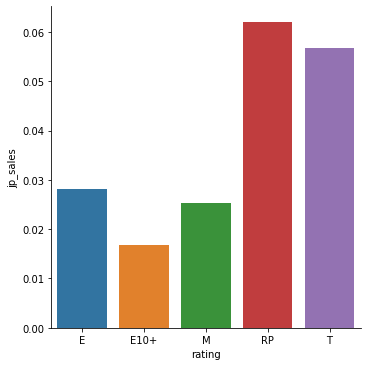

In [48]:
#построим графики для сравнения продаж
eu_rating_mean = data.pivot_table(index = ('rating'), values = 'eu_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='eu_sales', kind="bar", data=eu_rating_mean)

na_rating_mean = data.pivot_table(index = ('rating'), values = 'na_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='na_sales', kind="bar", data=na_rating_mean)

jp_rating_mean = data.pivot_table(index = ('rating'), values = 'jp_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='jp_sales', kind="bar", data=jp_rating_mean)

**Выводы по общим данным:**
- в Европе и Северной Америке самыми продаваемыми являются игры для зрелого возраста(М) 
- Тинейджеры Северной Америки и Европы не так увлечены видеоиграми, как в Японии
- В Японии очень популярны игры, которыене выходили на Американский рынок. 

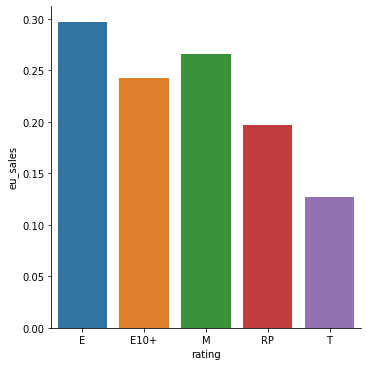

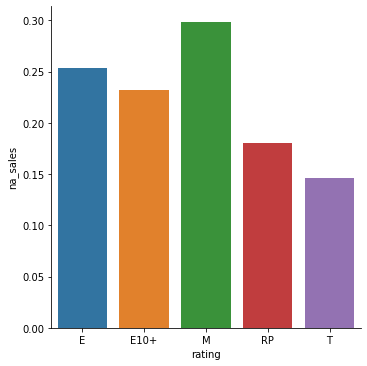

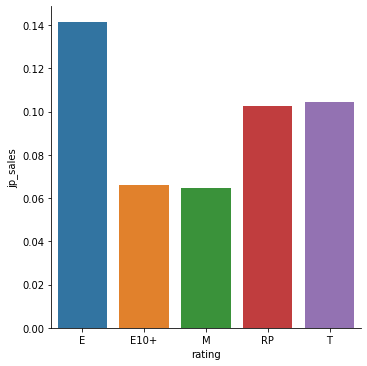

In [49]:
#выберем только те игры, что имели продажи во всех регионах
rating_data = data[(data['eu_sales'] > 0) & (data['na_sales'] > 0) & (data['jp_sales'] > 0)]

#построим графики для сравнения
eu_rating_mean = rating_data.pivot_table(index = ('rating'), values = 'eu_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='eu_sales', kind="bar", data=eu_rating_mean)

na_rating_mean = rating_data.pivot_table(index = ('rating'), values = 'na_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='na_sales', kind="bar", data=na_rating_mean)

jp_rating_mean = rating_data.pivot_table(index = ('rating'), values = 'jp_sales', aggfunc = ('mean')).reset_index()
sns.catplot(x='rating', y='jp_sales', kind="bar", data=jp_rating_mean)

**Выводы по играм, продававшимся во всех регионах:**
- в Европе и  Северной Америке все так же популярны игры для зрелого возраста(М)и для детей(и взрослых): E(Everyone), а вот тинейджеры в видеоигры особо не играют.  
- в этом срезе в Японии в лидеры вырвалась категория E, но тинейджеры так же остались на лидирующей позиции. 

Если говорить о портрете пользователя по регионам, то можно предположить следующее:

**Европа:** Человек зрелого возраста, играющий в экшн-игры на PlayStation3.

**Северная Америка:** Ребенок, до 13 лет, играющий в экшн-игры на X-360.

**Япония:** Тинейджер, играющий в RPG на портативной Nintendo.

### Проверка гипотез  <a id='Гипотезы'></a>

###### 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не различаются

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые отличаются друг от друга

In [51]:
#сформируем выборки для анализа
#выберем строки, в которых установлен рейтинг
xone_user_rating = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_user_rating = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']


#чтобы выборки были соизмеримы, возьмем равные семплы данных из каждого среза
xone_user_rating = xone_user_rating.sample(100)
pc_user_rating = pc_user_rating.sample(100)


#применяем статистический тест
alpha = 0.05

results = st.ttest_ind(
    xone_user_rating, 
    pc_user_rating)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.00233018698297135
Отвергаем нулевую гипотезу


In [52]:
#посмотрим на само среднее значение оценок
print(xone_user_rating.mean()) 
print(pc_user_rating.mean())

71.6
77.09


**Вывод:**
- средние пользовательские рейтинги платформ Xbox One и PC, действительно различаются.

###### 2) Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:** cредние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** cредние пользовательские рейтинги жанров Action и Sports отличаются.

In [53]:
#сформируем выборки для анализа
#выберем строки, в которых установлен рейтинг
action_user_rating = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports_user_rating = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

#чтобы выборки были соизмеримы, возьмем равные семплы данных из каждого среза
action_user_rating = action_user_rating.sample(80)
sports_user_rating = sports_user_rating.sample(80)



#применяем статистический тест
alpha = 0.05 

results = st.ttest_ind(
    action_user_rating, 
    sports_user_rating)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6919069635185023
Не получилось отвергнуть нулевую гипотезу


In [54]:
#посмотрим на само среднее значение оценок
print(sports_user_rating.mean())
print(action_user_rating.mean())

69.975
70.8375


**Выводы:**
- cредние пользовательские рейтинги жанров Action и Sports отличаютсяне значимо;
- исходя из данных двух тестов можно сделать вывод, что средние оценки пользователя будут отличаться в зависимости от платформы, но не от жанра.

### Общий вывод <a id='Выводы'></a>

Мировой финансовый кризис очень ярко отразился на игровой индустрии. После 2008 года видим падение, сохраняющееся несколько лет. В данный момент индустрия пришла в себя и начала показывать рост. В наших данных роста за 2016 год мы не видим из-за отсутствия части данных, но он вероятнее всего есть;


При планировании рекламных компаний на 2017 год стоит учесть следующее:

 - для РК стоит выбирать платформы вышедшие не более 3 лет назад. На момент 2016 года стоит рассмотреть PlayStation4 и X One; 
 - важно учитывать регион, в котором планируется РК и его особенности: популярные платформы и жанры. Портрет польльзователя предоставлен в исследовании выше;
 - для того, чтобы выбрать перспективную игру, можно обратиться к оценке профессиональных критиков;